In [1]:
!python.exe -m pip install --upgrade pip

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%pip install numpy matplotlib scikit-learn tensorflow


Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data directory and parameters
data_dir = "color"
batch_size = 32
img_height = 128
img_width = 128
validation_split = 0.2

# Use ImageDataGenerator for loading and augmenting the data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=validation_split
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 43456 images belonging to 38 classes.
Found 10849 images belonging to 38 classes.


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


c:\Users\trdee\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         4,902 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,309,542 (12.62 MB)

 Trainable params: 3,309,542 (12.62 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Train the model
epochs = 20
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)
model.save("plant_disease_model.h5")
# Ensure the 'models' folder exists
print("Model saved successfully!")

c:\Users\trdee\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1047s 770ms/step - accuracy: 0.4155 - loss: 2.1416 - val_accuracy: 0.7507 - val_loss: 0.8199
Epoch 2/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 388s 286ms/step - accuracy: 0.7684 - loss: 0.7506 - val_accuracy: 0.7959 - val_loss: 0.6462
Epoch 3/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 549s 405ms/step - accuracy: 0.8338 - loss: 0.5230 - val_accuracy: 0.8507 - val_loss: 0.4532
Epoch 4/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 488s 359ms/step - accuracy: 0.8695 - loss: 0.4015 - val_accuracy: 0.8830 - val_loss: 0.3558
Epoch 5/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 517s 381ms/step - accuracy: 0.8862 - loss: 0.3439 - val_accuracy: 0.9073 - val_loss: 0.2862
Epoch 6/20
 323/1358 ━━━━━━━━━━━━━━━━━━━━ 6:55 401ms/step - accuracy: 0.9100 - loss: 0.2739

KeyboardInterrupt: 

In [7]:
import keras.saving
keras.saving.save_model(model, 'my_model.keras')


In [12]:
print(model.input_shape)


(None, 128, 128, 3)


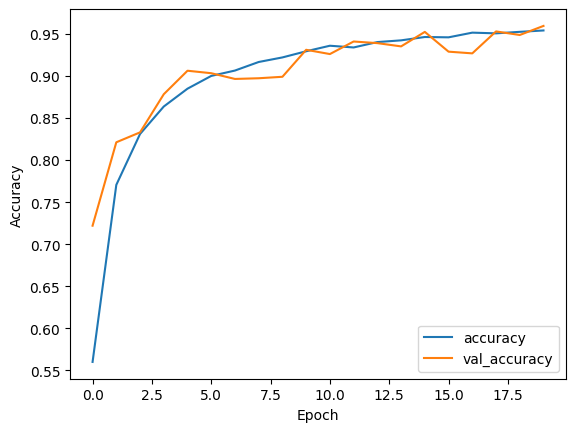

In [8]:
# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [9]:
# Print final training and validation accuracy
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {final_train_acc * 100:.2f}%")
print(f"Final Validation Accuracy: {final_val_acc * 100:.2f}%")

Final Training Accuracy: 95.41%
Final Validation Accuracy: 95.95%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


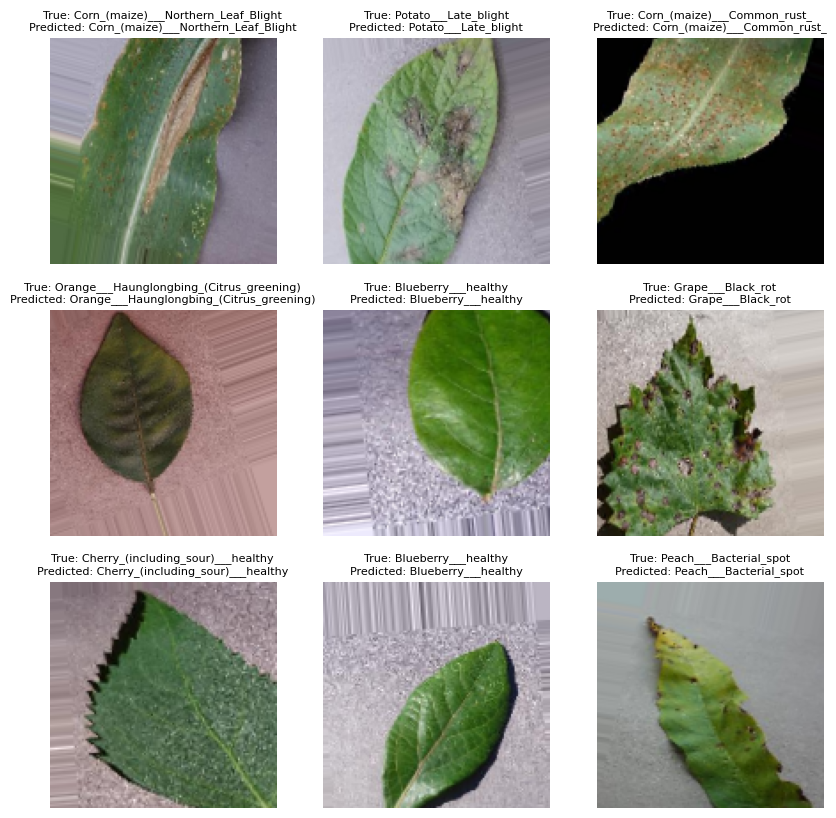

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Predict labels for a batch of images from the validation set
sample_images, sample_labels = next(validation_generator)
predicted_labels = model.predict(sample_images)

# Plot images with true and predicted labels
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(sample_images[i])
    true_label = list(train_generator.class_indices.keys())[np.argmax(sample_labels[i])]
    predicted_label = list(train_generator.class_indices.keys())[np.argmax(predicted_labels[i])]
    plt.title(f'True: {true_label}\nPredicted: {predicted_label}', fontsize=8)
    plt.axis('off')

plt.show()

In [21]:
# Save the entire model
model.save("plant_disease_model.h5")


In [22]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("plant_disease_model.h5")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


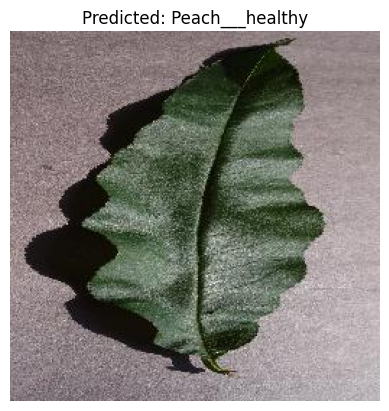

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load Model
model = tf.keras.models.load_model('plant_disease_model.h5')
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Function to preprocess image
def preprocess_image(img_path, target_size=(img_height, img_width)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize if trained with normalized images
    return img_array

# Predict on unseen image
img_path = r"C:\Users\trdee\OneDrive\Desktop\The\color\Peach___healthy\0f9f9b7d-8396-4c62-8700-5008ca0b9db4___Rutg._HL 3613.JPG"  # Replace with your image path"
processed_img = preprocess_image(img_path)
prediction = model.predict(processed_img)
predicted_class = np.argmax(prediction)

# Map predicted index to class label
class_labels = list(train_generator.class_indices.keys())  # Get class names
predicted_label = class_labels[predicted_class]

# Display the image and prediction
plt.imshow(image.load_img(img_path))
plt.title(f'Predicted: {predicted_label}')
plt.axis('off')
plt.show()


In [17]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np

# Load the trained model
model = load_model("my_model.keras")

# Define class labels based on dataset
class_labels = {
    0: "Apple___Apple_scab",
    1: "Apple___Black_rot",
    2: "Apple___Cedar_apple_rust",
    3: "Apple___healthy",
    4: "Blueberry___healthy",
    5: "Cherry_(including_sour)___Powdery_mildew",
    6: "Cherry_(including_sour)___healthy",
    7: "Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot",
    8: "Corn_(maize)___Common_rust_",
    9: "Corn_(maize)___Northern_Leaf_Blight",
    10: "Corn_(maize)___healthy",
    11: "Grape___Black_rot",
    12: "Grape___Esca_(Black_Measles)",
    13: "Grape___Leaf_blight_(Isariopsis_Leaf_Spot)",
    14: "Grape___healthy",
    15: "Orange___Haunglongbing_(Citrus_greening)",
    16: "Peach___Bacterial_spot",
    17: "Peach___healthy",
    18: "Pepper,_bell___Bacterial_spot",
    19: "Pepper,_bell___healthy",
    20: "Potato___Early_blight",
    21: "Potato___Late_blight",
    22: "Potato___healthy",
    23: "Raspberry___healthy",
    24: "Soybean___healthy",
    25: "Squash___Powdery_mildew",
    26: "Strawberry___Leaf_scorch",
    27: "Strawberry___healthy",
    28: "Tomato___Bacterial_spot",
    29: "Tomato___Early_blight",
    30: "Tomato___Late_blight",
    31: "Tomato___Leaf_Mold",
    32: "Tomato___Septoria_leaf_spot",
    33: "Tomato___Spider_mites Two-spotted_spider_mite",
    34: "Tomato___Target_Spot",
    35: "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    36: "Tomato___Tomato_mosaic_virus",
    37: "Tomato___healthy"
}

# Function to preprocess the image
def preprocess_image(img_path):
    img = cv2.imread(img_path)  # Read the image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img = cv2.resize(img, (128, 128))  # Resize to match model input size
    img = img / 255.0  # Normalize pixel values (0 to 1)
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Load & preprocess test image
img_path = r"C:\Users\trdee\OneDrive\Desktop\The\color\Peach___Bacterial_spot\0bbbbca0-8fac-4f04-aea3-d99769c11923___Rut._Bact.S 1032.JPG"  # Change this path accordingly
img = preprocess_image(img_path)

# Predict
predictions = model.predict(img)
class_idx = np.argmax(predictions)  # Get the index of highest probability
class_name = class_labels[class_idx]  # Get corresponding class name

# Print results
print(f"Predicted Class Index: {class_idx}")
print(f"Predicted Class Name: {class_name}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Predicted Class Index: 16
Predicted Class Name: Peach___Bacterial_spot


In [11]:
import os

dataset_path = "color"  # Update this
class_folders = sorted(os.listdir(dataset_path))  # Sort to match training order

for i, folder in enumerate(class_folders):
    print(f"Index {i}: {folder}")


Index 0: Apple___Apple_scab
Index 1: Apple___Black_rot
Index 2: Apple___Cedar_apple_rust
Index 3: Apple___healthy
Index 4: Blueberry___healthy
Index 5: Cherry_(including_sour)___Powdery_mildew
Index 6: Cherry_(including_sour)___healthy
Index 7: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Index 8: Corn_(maize)___Common_rust_
Index 9: Corn_(maize)___Northern_Leaf_Blight
Index 10: Corn_(maize)___healthy
Index 11: Grape___Black_rot
Index 12: Grape___Esca_(Black_Measles)
Index 13: Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Index 14: Grape___healthy
Index 15: Orange___Haunglongbing_(Citrus_greening)
Index 16: Peach___Bacterial_spot
Index 17: Peach___healthy
Index 18: Pepper,_bell___Bacterial_spot
Index 19: Pepper,_bell___healthy
Index 20: Potato___Early_blight
Index 21: Potato___Late_blight
Index 22: Potato___healthy
Index 23: Raspberry___healthy
Index 24: Soybean___healthy
Index 25: Squash___Powdery_mildew
Index 26: Strawberry___Leaf_scorch
Index 27: Strawberry___healthy
Index 28: To

In [16]:
import numpy as np
import cv2
from tensorflow.keras.preprocessing import image

class_labels = [
    "Apple___Apple_scab", "Apple___Black_rot", "Apple___Cedar_apple_rust", "Apple___healthy",
    "Blueberry___healthy", "Cherry_(including_sour)___Powdery_mildew", "Cherry_(including_sour)___healthy",
    "Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot", "Corn_(maize)___Common_rust_", "Corn_(maize)___Northern_Leaf_Blight",
    "Corn_(maize)___healthy", "Grape___Black_rot", "Grape___Esca_(Black_Measles)", "Grape___Leaf_blight_(Isariopsis_Leaf_Spot)",
    "Grape___healthy", "Orange___Haunglongbing_(Citrus_greening)", "Peach___Bacterial_spot", "Peach___healthy",
    "Pepper,_bell___Bacterial_spot", "Pepper,_bell___healthy", "Potato___Early_blight", "Potato___Late_blight",
    "Potato___healthy", "Raspberry___healthy", "Soybean___healthy", "Squash___Powdery_mildew", "Strawberry___Leaf_scorch",
    "Strawberry___healthy", "Tomato___Bacterial_spot", "Tomato___Early_blight", "Tomato___Late_blight", "Tomato___Leaf_Mold",
    "Tomato___Septoria_leaf_spot", "Tomato___Spider_mites Two-spotted_spider_mite", "Tomato___Target_Spot",
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus", "Tomato___Tomato_mosaic_virus", "Tomato___healthy"
]

# Load the image
img_path = r"C:\Users\trdee\OneDrive\Desktop\The\color\Peach___Bacterial_spot\0bbbbca0-8fac-4f04-aea3-d99769c11923___Rut._Bact.S 1032.JPG"  # Change this to your image path
img = image.load_img(img_path, target_size=(128, 128))  # Resize to match model input

# Convert image to numpy array
img_array = image.img_to_array(img)

# Normalize (if your model was trained with normalization)
img_array = img_array / 255.0

# Expand dimensions to match model input shape
img_array = np.expand_dims(img_array, axis=0)

# Predict
predictions = model.predict(img_array)

# Get top 3 predictions
top_3_indices = np.argsort(predictions[0])[-3:][::-1]

# Assuming you have `class_labels` as a list of class names
for idx in top_3_indices:
    print(f"Predicted Index: {idx}, Class: {class_labels[idx]}, Confidence: {predictions[0][idx]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Index: 16, Class: Peach___Bacterial_spot, Confidence: 1.00
Predicted Index: 0, Class: Apple___Apple_scab, Confidence: 0.00
Predicted Index: 17, Class: Peach___healthy, Confidence: 0.00


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Load your trained model
model = tf.keras.models.load_model("my_model.keras")
